Neural Network to Predict Customer Ranking on random sampled data

Library : PyTorch

In [0]:
import torch

In [0]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [0]:
class PurchasePredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [0]:
torch.manual_seed(42)

num_customers = 500

# Features:
# [Age, Annual Income, Time Spent on Website]
X = torch.randn(num_customers, 3)

# Non-linear purchase behavior
y = (
    0.4 * X[:, 0] +          # age influence
    0.6 * X[:, 1] +          # income influence
    0.9 * X[:, 2] +          # engagement
    torch.sin(X[:, 0])       # non-linearity
    > 0
).float().unsqueeze(1)

In [0]:
model = PurchasePredictor()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [0]:
epochs = 2000
losses = []

for epoch in range(epochs):
    y_pred = model(X)

    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")


Epoch 0 | Loss: 0.7232
Epoch 200 | Loss: 0.0031
Epoch 400 | Loss: 0.0006
Epoch 600 | Loss: 0.0003
Epoch 800 | Loss: 0.0001
Epoch 1000 | Loss: 0.0001
Epoch 1200 | Loss: 0.0001
Epoch 1400 | Loss: 0.0000
Epoch 1600 | Loss: 0.0000
Epoch 1800 | Loss: 0.0000


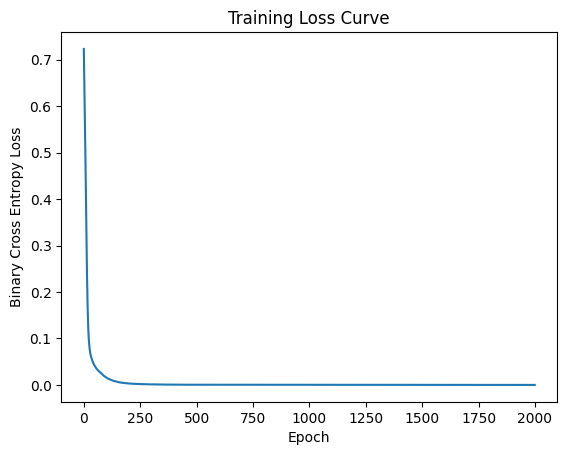

In [0]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

In [0]:
with torch.no_grad():
    purchase_scores = model(X).squeeze()

# Rank customers (high score = high rank)
ranked_scores, ranked_indices = torch.sort(
    purchase_scores, descending=True
)

In [0]:
top_k = 10

print("Top Customers to Target:")
for i in range(top_k):
    idx = ranked_indices[i].item()
    score = ranked_scores[i].item()
    print(f"Customer {idx} | Purchase Probability: {score:.4f}")

Top Customers to Target:
Customer 391 | Purchase Probability: 1.0000
Customer 207 | Purchase Probability: 1.0000
Customer 206 | Purchase Probability: 1.0000
Customer 205 | Purchase Probability: 1.0000
Customer 476 | Purchase Probability: 1.0000
Customer 203 | Purchase Probability: 1.0000
Customer 202 | Purchase Probability: 1.0000
Customer 201 | Purchase Probability: 1.0000
Customer 388 | Purchase Probability: 1.0000
Customer 385 | Purchase Probability: 1.0000
